<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/neurokit_peaks_5_sep_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install pyvital vitaldb vital
!pip install neurokit2
import vitaldb
import pandas as pd
import numpy as np

df_cases = pd.read_csv("https://api.vitaldb.net/cases")  # Load clinical data
df_trks = pd.read_csv('https://api.vitaldb.net/trks')  # Load track list
df_labs = pd.read_csv('https://api.vitaldb.net/labs')  # Load lab result

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.0/55.0 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.5/202.5 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 9.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.7/824.7 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 428.8/428.8 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 42.6 

In [6]:
df_cases

caseid  subjectid  casestart  caseend  anestart   aneend  opstart  \
0          1       5955          0    11542      -552  10848.0     1668   
1          2       2487          0    15741     -1039  14921.0     1721   
2          3       2861          0     4394      -590   4210.0     1090   
3          4       1903          0    20990      -778  20222.0     2522   
4          5       4416          0    21531     -1009  22391.0     2591   
...      ...        ...        ...      ...       ...      ...      ...   
6383    6384       5583          0    15248      -260  15640.0     2140   
6384    6385       2278          0    20643      -544  20996.0     2396   
6385    6386       4045          0    19451      -667  19133.0     3533   
6386    6387       5230          0    12025      -550  12830.0     1730   
6387    6388       1306          0    10249       -79  10121.0     2321   

      opend     adm      dis  ...  intraop_colloid  intraop_ppf  intraop_mdz  \
0     10368 -236220   627780  ...                0          120          0.0   
1     14621 -221160  1506840  ...                0          150          0.0   
2      3010 -218640    40560  ...                0            0          0.0   
3     17822 -201120   576480  ...                0           80          0.0   
4     20291  -67560  3734040  ...                0            0          0.0   
...     ...     ...      ...  ...              ...          ...          ...   
6383  14140 -215340   648660  ...                0          150          0.0   
6384  19496 -225600  1675200  ...                0          100          0.0   
6385  18233 -200460   836340  ...                0           70          0.0   
6386  11030 -227760   377040  ...                0          120          0.0   
6387   9221 -312060   379140  ...              500          120          0.0   

     intraop_ftn  intraop_rocu  intraop_vecu  intraop_eph  intraop_phe  \
0            100            70             0           10            0   
1              0           100             0           20            0   
2              0            50             0            0            0   
3            100           100             0           50            0   
4              0           160             0           10          900   
...          ...           ...           ...          ...          ...   
6383           0            90             0           20            0   
6384           0           100             0           25           30   
6385           0           130             0           10            0   
6386           0            50             0            0            0   
6387           0            90             0           20            0   

      intraop_epi intraop_ca  
0               0          0  
1               0          0  
2               0          0  
3               0          0  
4               0       2100  
...           ...        ...  
6383            0          0  
6384            0        300  
6385            0          0  
6386            0          0  
6387            0          0  

[6388 rows x 74 columns]

In [8]:
op_st = df_cases[(df_cases['caseid'] == caseids[0])]['opstart'].values[0]
op_end = df_cases[(df_cases['caseid'] == caseids[0])]['opend'].values[0]
op_st,op_end

(1668, 10368)

In [20]:
(op_end-op_st)

8700

In [11]:
# inclusion / exclusion criteria
caseids = list(
    set(df_trks.loc[df_trks['tname'] == 'SNUADC/ECG_II', 'caseid'])
)

print('Total {} cases found'.format(len(caseids)))

Total 6355 cases found


In [14]:
import vitaldb
import neurokit2 as nk
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['font.size']= 14

def nrml_plt(sig):
  plt.figure(figsize=(20,15))
  plt.subplot(211)
  plt.plot(sig, color='coral')
  plt.grid(True)
  plt.show()



srate = 100
vals = vitaldb.load_case(caseids[0], ['SNUADC/ECG_II'], 1 / srate)


initial_signal = vals[:,0]

In [30]:
count = 0
seconds = 0
for i in tqdm(initial_signal):
  count+=1
  seconds = seconds + count*(1/500)
  if int(seconds) >= 1668:
    break


count2 = 0
seconds = 0
for i in tqdm(initial_signal):
  count2+=1
  seconds = seconds + count2*(1/500)
  if int(seconds) >= 10368:
    break

  0%|          | 0/1154111 [00:00<?, ?it/s]

  0%|          | 0/1154111 [00:00<?, ?it/s]

In [31]:
count,count2

(1292, 3220)

In [19]:
count*(1/500)

2308.222

In [ ]:

initial_signal = vals[:,0][np.logical_not(np.isnan(vals[:,0]))]

initial_signal = initial_signal[(initial_signal>= -.25) & (initial_signal<=.25)]

In [ ]:
#nrml_plt(initial_signal)
print("After Cleaning")
neurokit_filtered_ecg = nk.ecg_clean(initial_signal, sampling_rate=srate)
#nrml_plt(neurokit_filtered_ecg)


After Cleaning


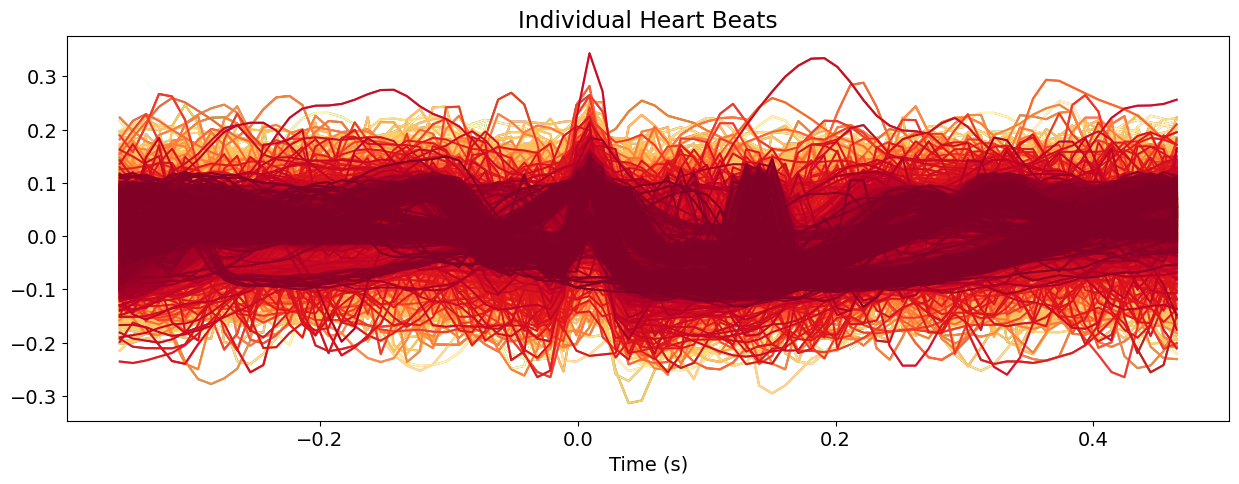

In [ ]:
# Plotting all the heart beats
epochs = nk.ecg_segment(neurokit_filtered_ecg, rpeaks=None, sampling_rate=100, show=True)

In [ ]:
# Extract R-peaks locations
_, rpeaks = nk.ecg_peaks(neurokit_filtered_ecg[:4000], sampling_rate=100)
# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(neurokit_filtered_ecg[:4000], rpeaks, sampling_rate=100, method="peak")

In [ ]:
ecg_signal = neurokit_filtered_ecg[:4000]

Signal Processing

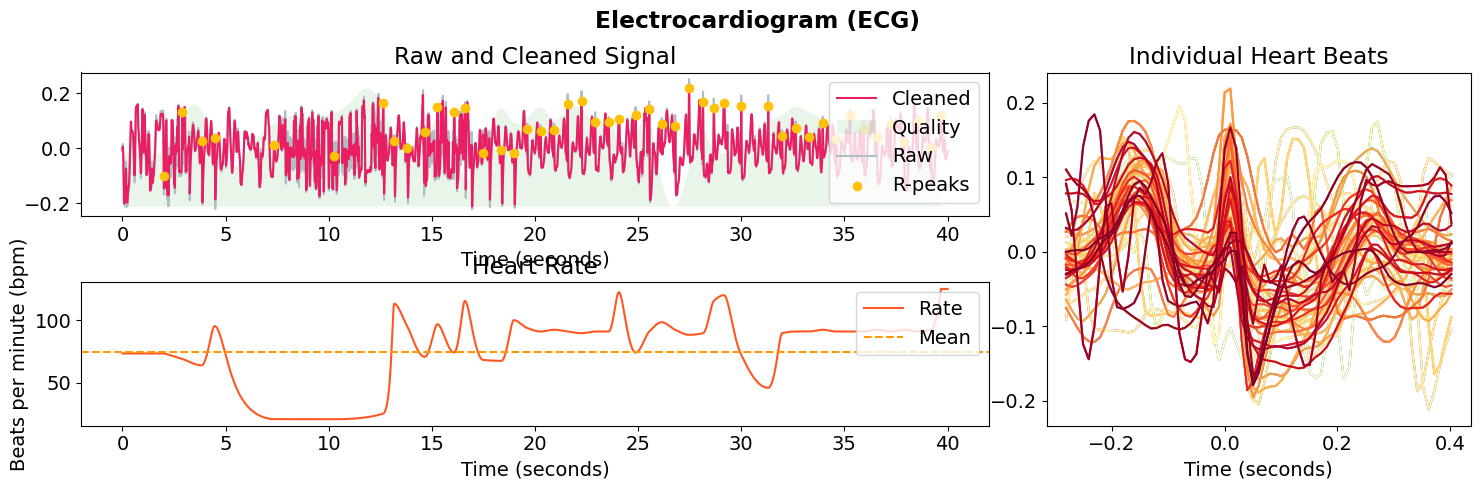

In [ ]:
#Cardiac activity (ECG)

# Process it
signals, info = nk.ecg_process(ecg_signal, sampling_rate=100)

# Visualise the processing
nk.ecg_plot(signals, sampling_rate=100)

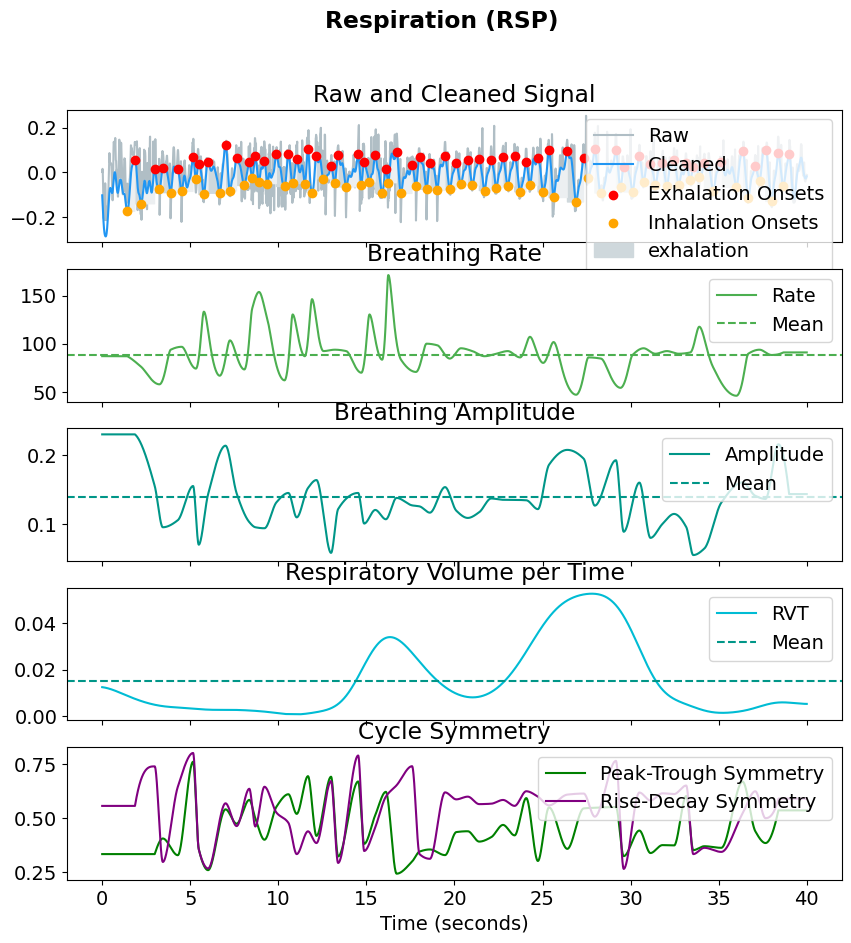

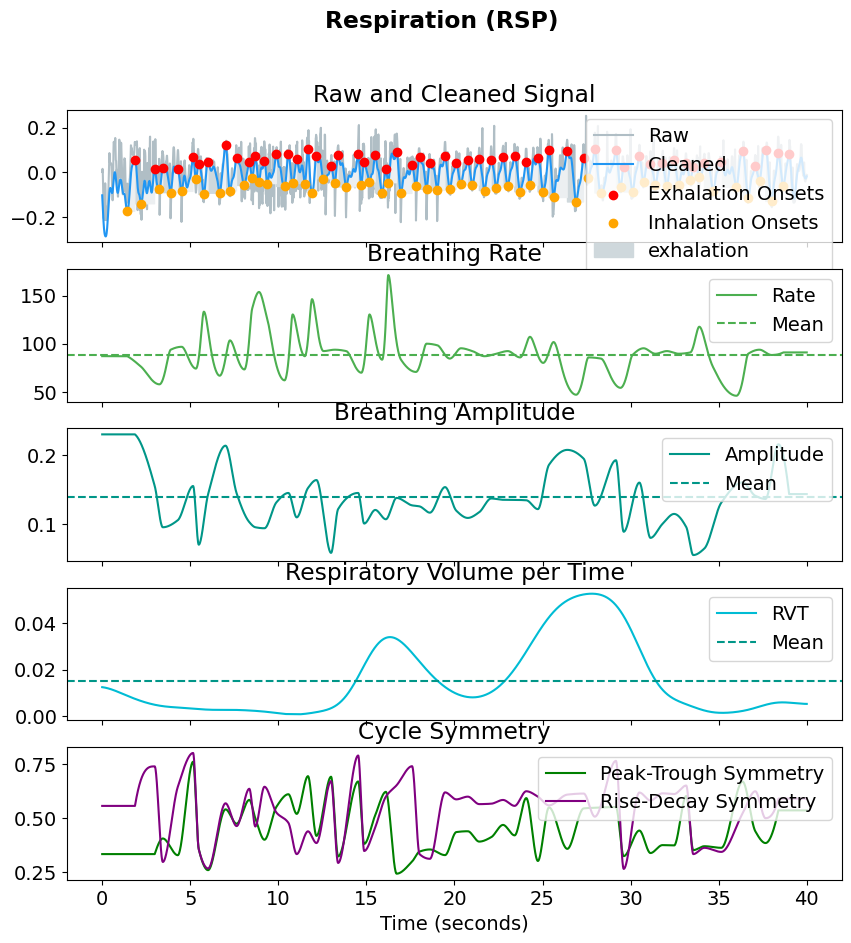

In [ ]:
#(RSP) signal

# Process it
signals, info = nk.rsp_process(ecg_signal, sampling_rate=100)

# Visualise the processing
nk.rsp_plot(signals, sampling_rate=100)

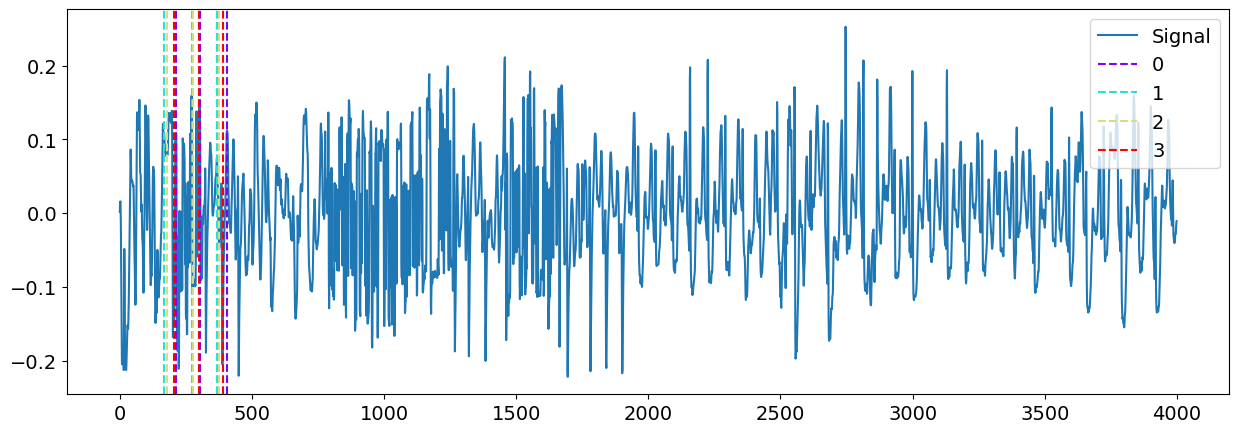

In [ ]:
# Zooming into the first 3 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:3],
                       waves_peak['ECG_P_Peaks'][:3],
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3]], ecg_signal[:4000])

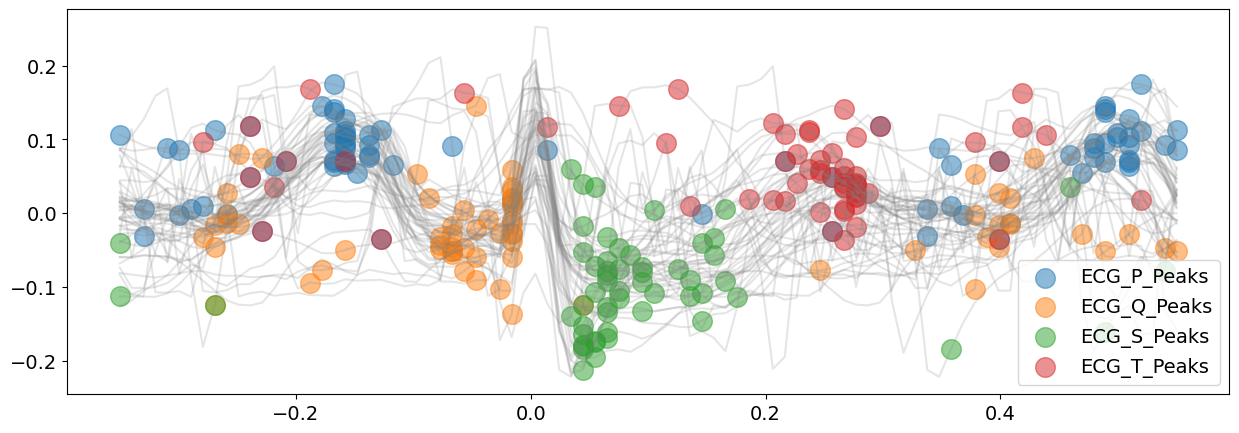

In [ ]:
# Delineate the ECG signal and visualizing all peaks of ECG complexes
_, waves_peak = nk.ecg_delineate(ecg_signal,
                                 rpeaks,
                                 sampling_rate=srate,
                                 method="peak",
                                 show=True,
                                 show_type='peaks')

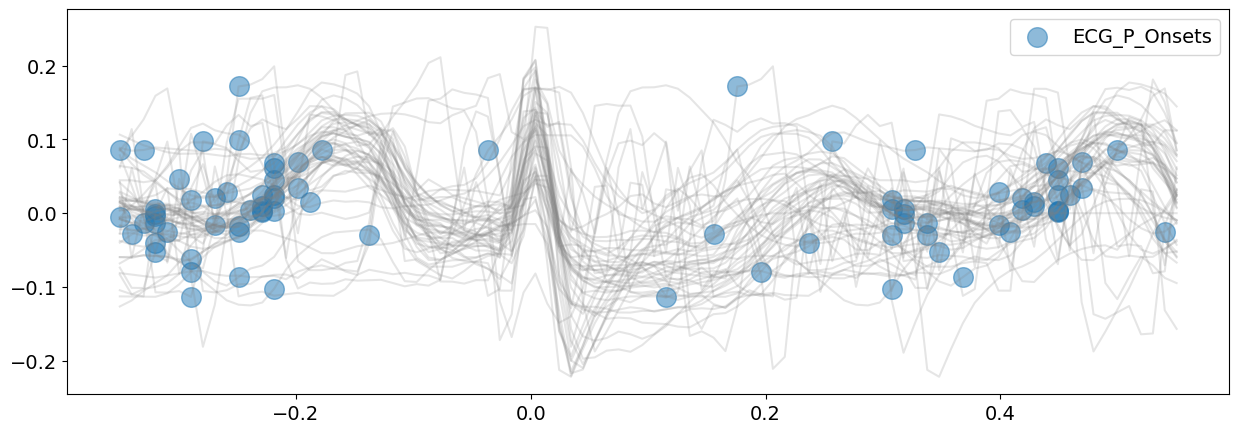

In [ ]:
# Delineate the ECG signal and visualizing all P-peaks boundaries
signal_peak, waves_peak = nk.ecg_delineate(ecg_signal,
                                           rpeaks,
                                           sampling_rate=srate,
                                           method="peak",
                                           show=True,
                                           show_type='bounds_P')

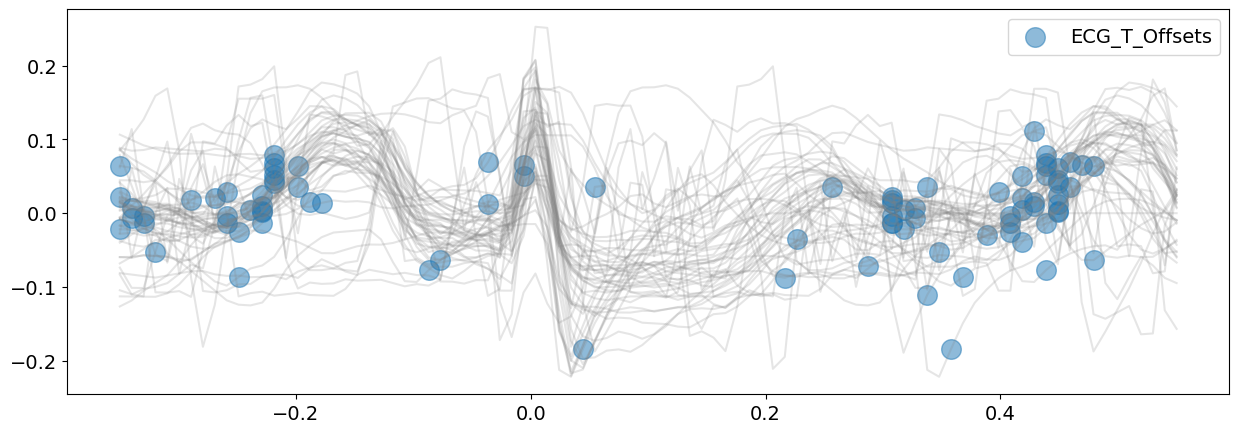

In [ ]:
# Delineate the ECG signal and visualizing all T-peaks boundaries
signal_peaj, waves_peak = nk.ecg_delineate(ecg_signal,
                                           rpeaks,
                                           sampling_rate=srate,
                                           method="peak",
                                           show=True,
                                           show_type='bounds_T')

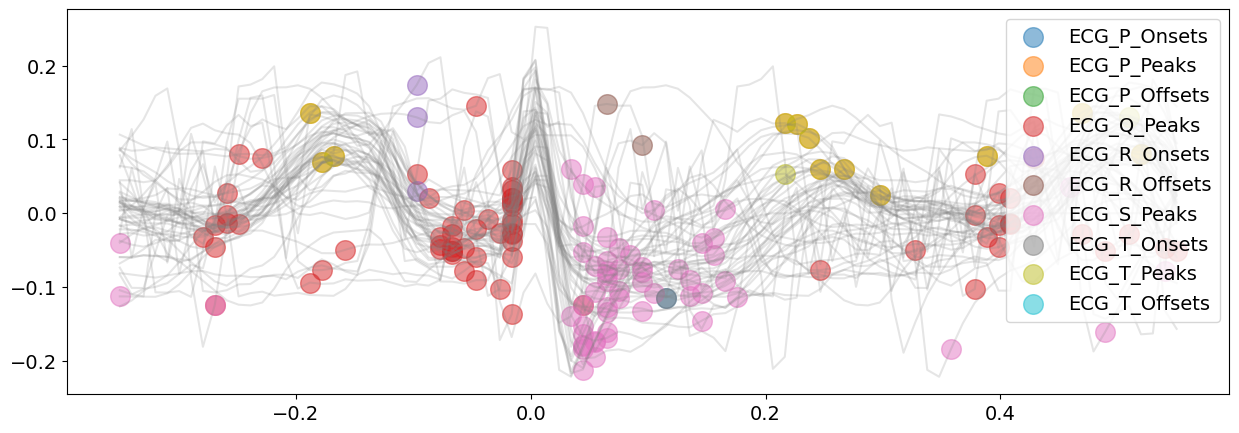

In [ ]:
# Delineate the ECG signal
signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal,
                                         rpeaks,
                                         sampling_rate=srate,
                                         method="cwt",
                                         show=True,
                                         show_type='all')

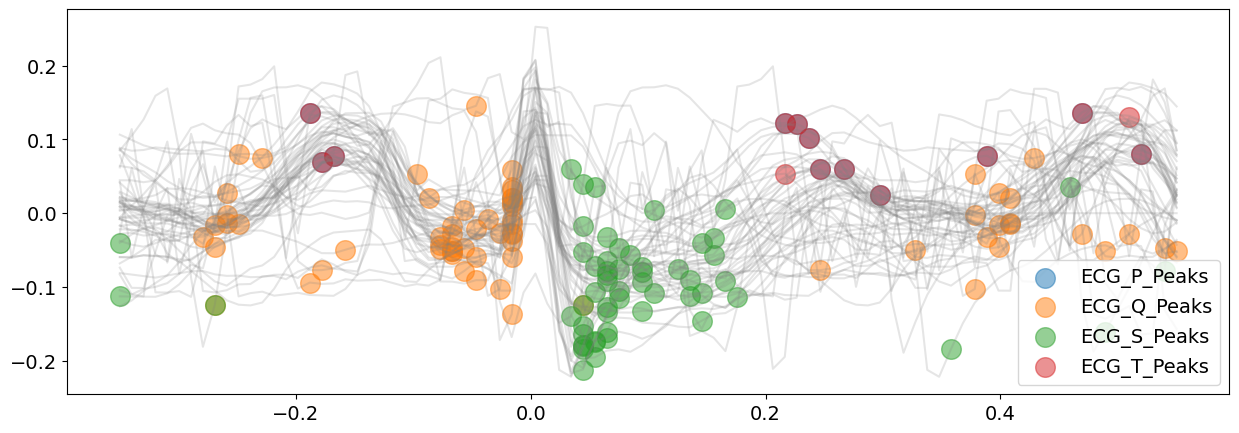

In [ ]:
# Visualize P-peaks and T-peaks
signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal,
                                         rpeaks,
                                         sampling_rate=srate,
                                         method="cwt",
                                         show=True,
                                         show_type='peaks')

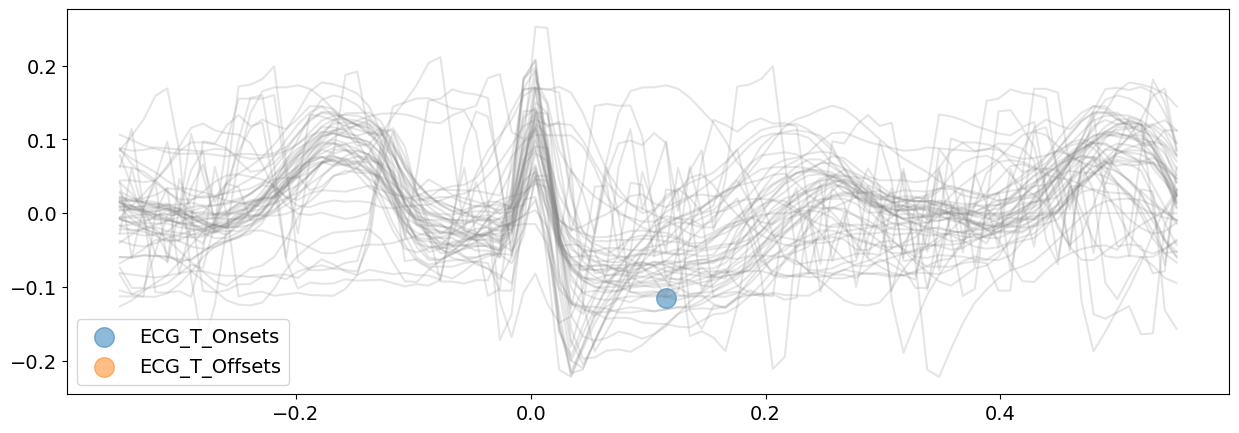

In [ ]:
# Visualize T-waves boundaries
signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal,
                                         rpeaks,
                                         sampling_rate=srate,
                                         method="cwt",
                                         show=True,
                                         show_type='bounds_T')

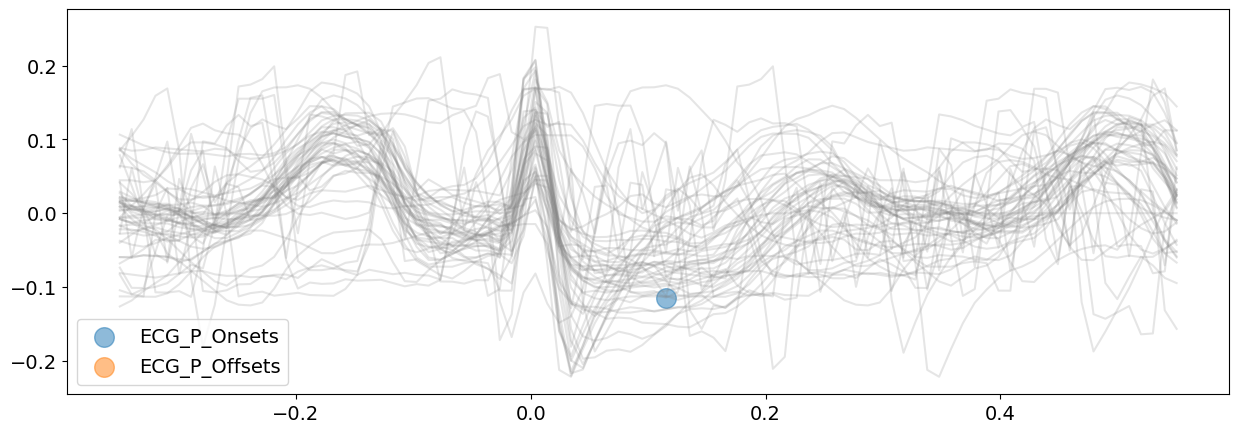

In [ ]:
# Visualize P-waves boundaries
signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal,
                                         rpeaks,
                                         sampling_rate=srate,
                                         method="cwt",
                                         show=True,
                                         show_type='bounds_P')

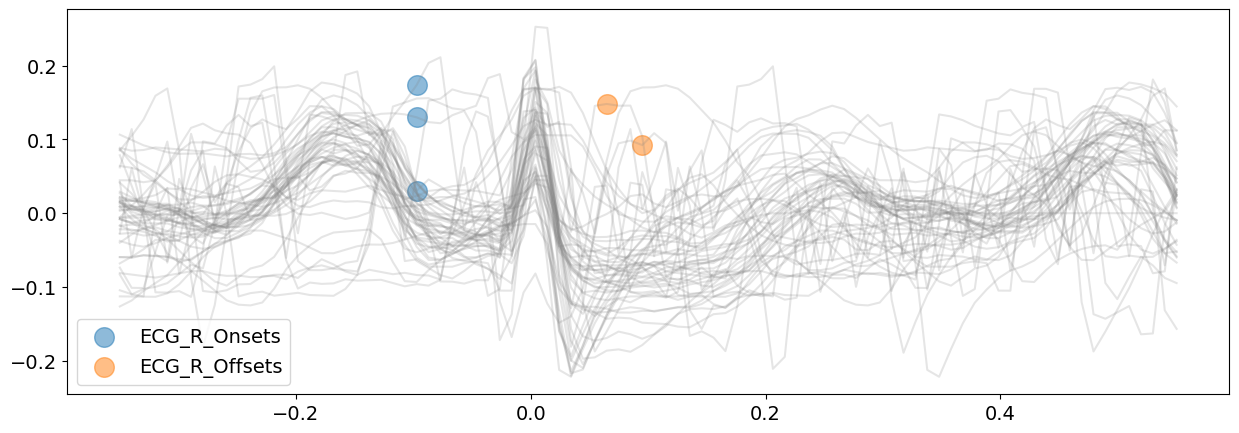

In [ ]:
# Visualize R-waves boundaries
signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal,
                                         rpeaks,
                                         sampling_rate=srate,
                                         method="cwt",
                                         show=True,
                                         show_type='bounds_R')

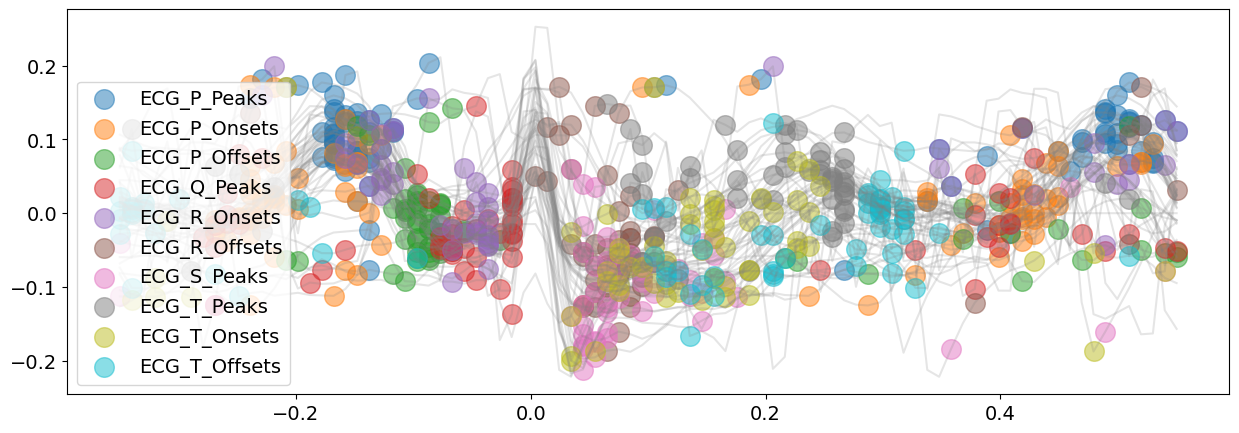

In [ ]:
# Delineate the ECG signal
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal,
                                         rpeaks,
                                         sampling_rate=srate,
                                         method="dwt",
                                         show=True,
                                         show_type='all')

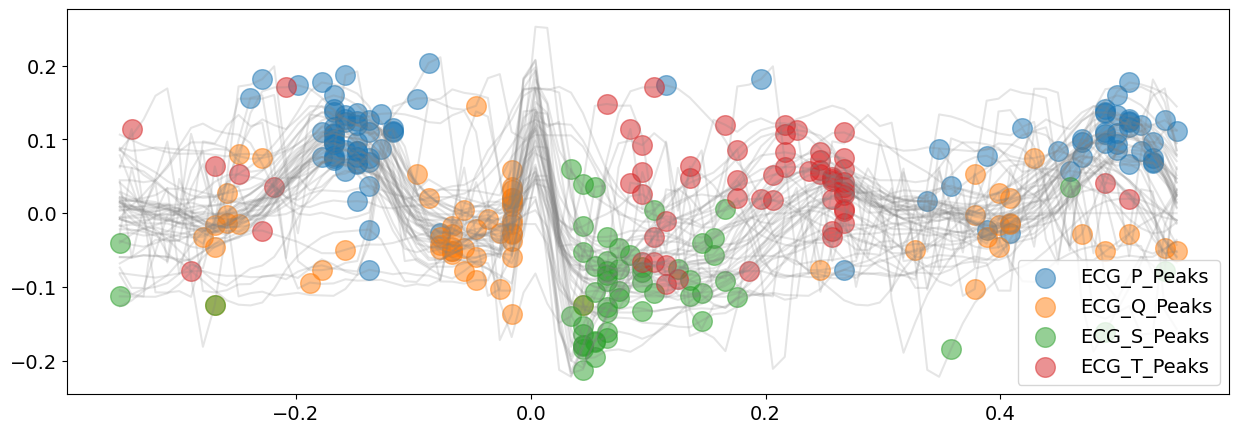

In [ ]:
# Visualize P-peaks and T-peaks
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal,
                                         rpeaks,
                                         sampling_rate=srate,
                                         method="dwt",
                                         show=True,
                                         show_type='peaks')

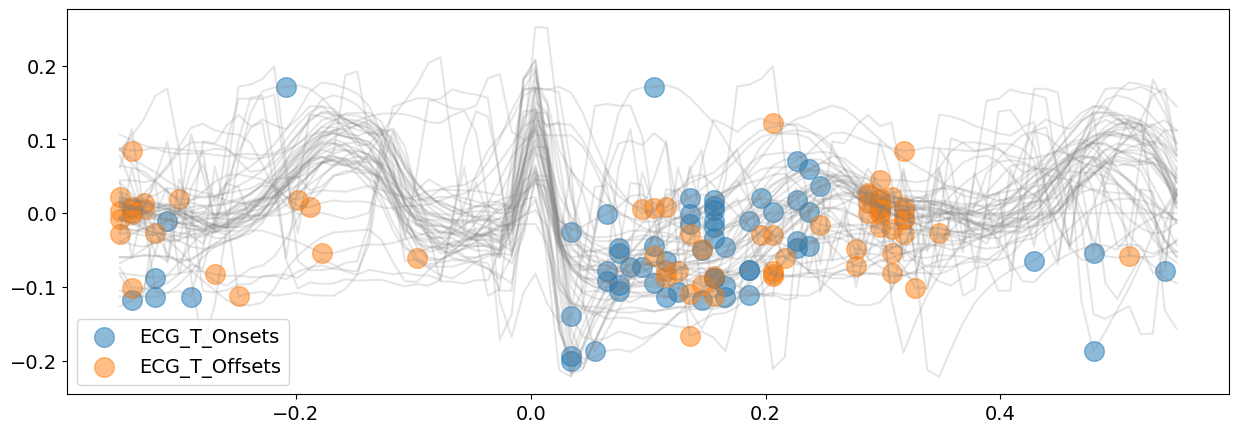

In [ ]:
# visualize T-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal,
                                         rpeaks,
                                         sampling_rate=srate,
                                         method="dwt",
                                         show=True,
                                         show_type='bounds_T')

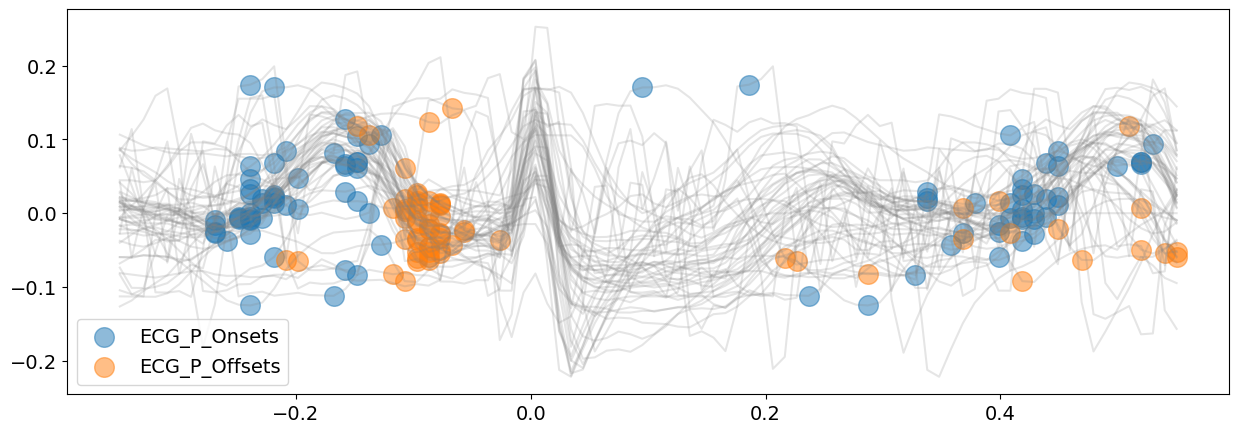

In [ ]:
# Visualize P-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal,
                                         rpeaks,
                                         sampling_rate=srate,
                                         method="dwt",
                                         show=True,
                                         show_type='bounds_P')

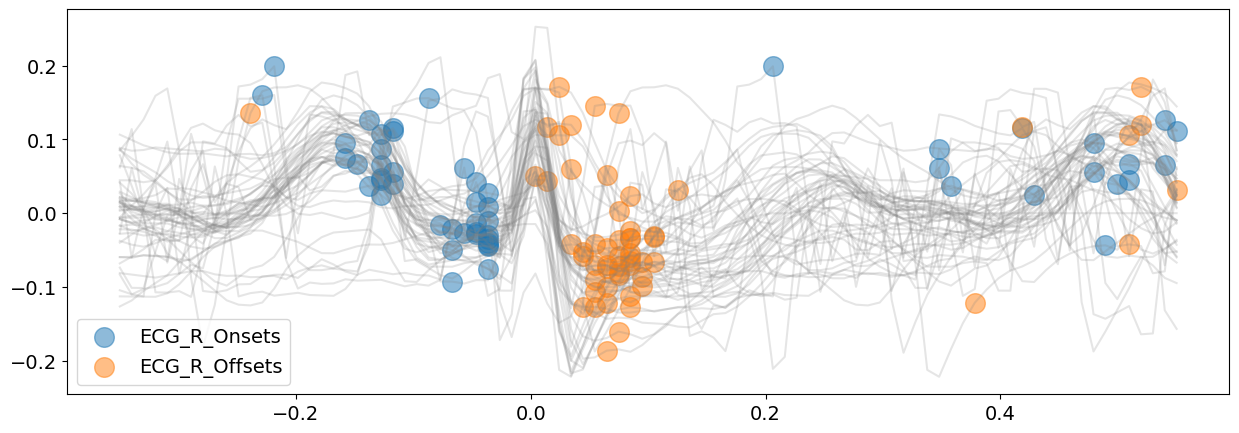

In [ ]:
# Visualize R-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal,
                                         rpeaks,
                                         sampling_rate=srate,
                                         method="dwt",
                                         show=True,
                                         show_type='bounds_R')